In [16]:
%matplotlib inline
from kbmodpy import kbmod as kb
import numpy as np
import matplotlib.pyplot as plt

In [17]:
p = kb.psf(1.5)
use_regions = False
stamp_size = 10
imcount = 15
image_dim = 2000
noise = 10
object_flux = 150.0
object_x = 100.7
object_y = 150.3
object_xv = 50
object_yv = 35
imlist = []
for i in range(imcount):
    imlist.append(kb.layered_image(
        "t"+str(i), 1000, 1000, noise, noise*noise, i/imcount))

In [18]:
for im in imlist:
    im.add_object(object_x+im.get_time()*object_xv, object_y+im.get_time()*object_yv, object_flux, p)

In [19]:
stack = kb.image_stack(imlist)
del imlist

In [20]:
search = kb.stack_search(stack, p)
del stack
search.set_debug(True)

In [21]:
if use_regions:
   results = search.region_search(55, 30, 15, 9.0, 10)
else:
   search.gpu( 80, 80, 0.2, 1.0, 50, 75, 10 )
   results = search.get_results(0, 10)


In [22]:
results

[lh: 9.964396 flux: 139.439362 x: 101 y: 152 x_v: 48.672401 y_v: 31.197477 obs_count: 15,
 lh: 9.865305 flux: 138.052704 x: 101 y: 152 x_v: 48.409306 y_v: 31.028843 obs_count: 15,
 lh: 9.828958 flux: 137.544067 x: 100 y: 151 x_v: 51.233337 y_v: 33.566463 obs_count: 15,
 lh: 9.798683 flux: 137.120407 x: 100 y: 152 x_v: 50.885056 y_v: 31.197895 obs_count: 15,
 lh: 9.780856 flux: 136.870941 x: 100 y: 151 x_v: 50.971943 y_v: 33.395206 obs_count: 15,
 lh: 9.761516 flux: 136.600311 x: 100 y: 151 x_v: 50.449154 y_v: 33.052692 obs_count: 15,
 lh: 9.758218 flux: 136.554153 x: 100 y: 151 x_v: 51.303341 y_v: 32.883827 obs_count: 15,
 lh: 9.757386 flux: 136.542511 x: 100 y: 149 x_v: 50.971859 y_v: 35.625195 obs_count: 15,
 lh: 9.745225 flux: 136.372330 x: 100 y: 150 x_v: 51.067642 y_v: 34.937252 obs_count: 15,
 lh: 9.739293 flux: 136.289322 x: 101 y: 151 x_v: 48.746387 y_v: 33.349194 obs_count: 15]

In [23]:
stamps = search.sci_stamps(results[0], stamp_size)

Starting at 0


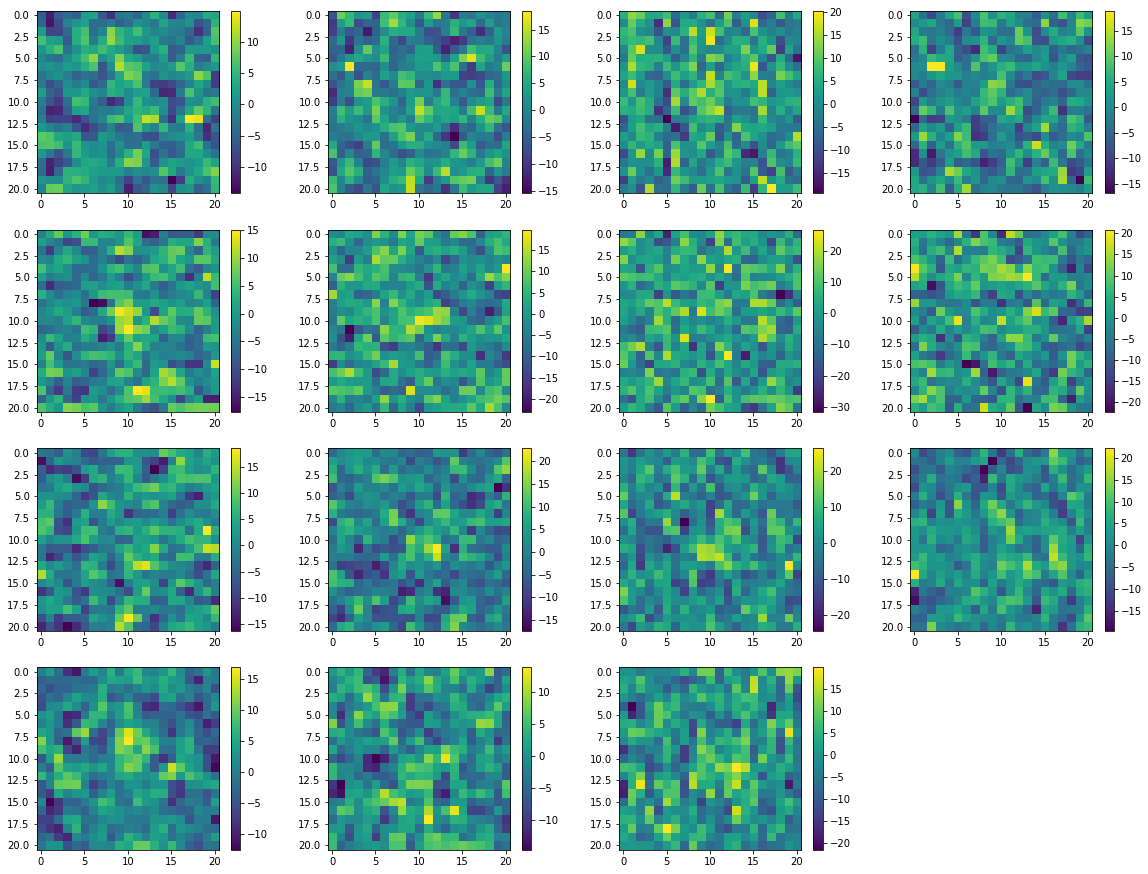

In [24]:
fig = plt.figure(figsize=(20, 100))
set_on = 1
plot_count = len(stamps)
print ('Starting at %i' % int((set_on - 1)*plot_count))
for i in range((set_on-1)*plot_count,set_on*plot_count):
    fig.add_subplot(25,4,i-(set_on-1)*plot_count+1)
    plt.imshow(stamps[i], #cmap=plt.cm.Greys_r, 
               interpolation=None)
    plt.colorbar()

In [25]:
psis, phis = search.lightcurve(results[0])

In [26]:
psis, phis

(array([[ 0.01304944],
        [ 0.0380532 ],
        [ 0.06580655],
        [ 0.03583225],
        [ 0.05518515],
        [ 0.05986546],
        [ 0.02463663],
        [ 0.01764862],
        [ 0.02169029],
        [ 0.0596226 ],
        [ 0.06922466],
        [ 0.03226375],
        [ 0.06659404],
        [ 0.01879433],
        [ 0.04807534]], dtype=float32), array([[ 0.00034044],
        [ 0.00034044],
        [ 0.00034044],
        [ 0.00034044],
        [ 0.00034044],
        [ 0.00034044],
        [ 0.00034044],
        [ 0.00034044],
        [ 0.00034044],
        [ 0.00034044],
        [ 0.00034044],
        [ 0.00034044],
        [ 0.00034044],
        [ 0.00034044],
        [ 0.00034044]], dtype=float32))

In [27]:
#plt.figure(figsize=[12,12])
###imlist[0].convolve(p)
#plt.imshow(imlist[0].science())
#plt.gca().invert_yaxis()
#plt.colorbar()

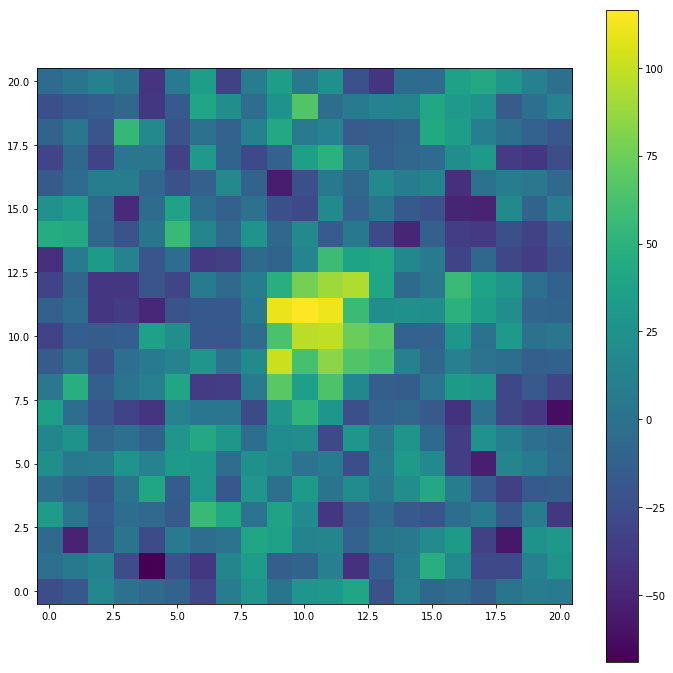

In [31]:
stacked = np.sum(np.array(s) for s in stamps)
plt.figure(figsize=[12,12])
plt.imshow(stacked)
plt.gca().invert_yaxis()
plt.colorbar()

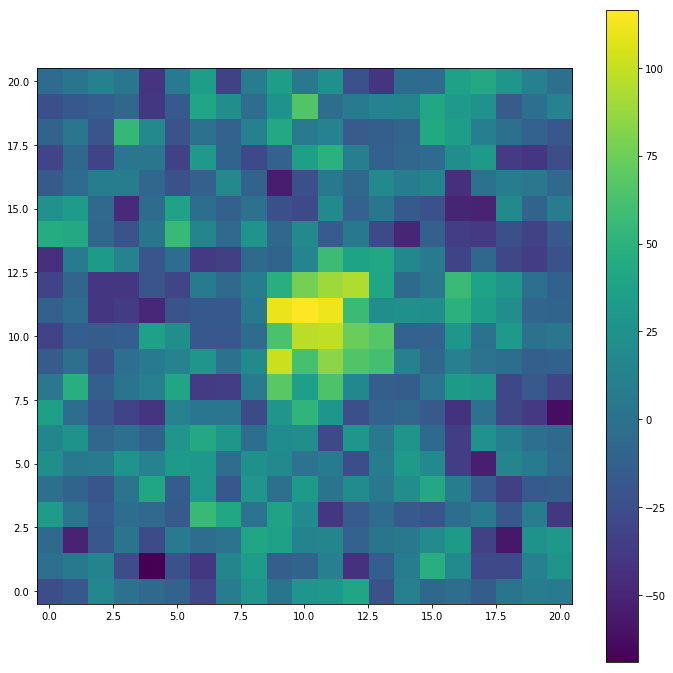

In [32]:
stacked2 = search.stacked_sci(results[0], stamp_size)
plt.figure(figsize=[12,12])
plt.imshow(stacked)
plt.gca().invert_yaxis()
plt.colorbar()

In [34]:
np.sum(stacked-stacked2)

0.0